In [1]:
import numpy as np
np.set_printoptions(precision = 3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

In [2]:
import os
os.chdir('C:/ESC2020_spring/finalproject')
happy = pd.read_csv('Seoul_Happiness_2014_train.csv')

# Problem Setting and EDA

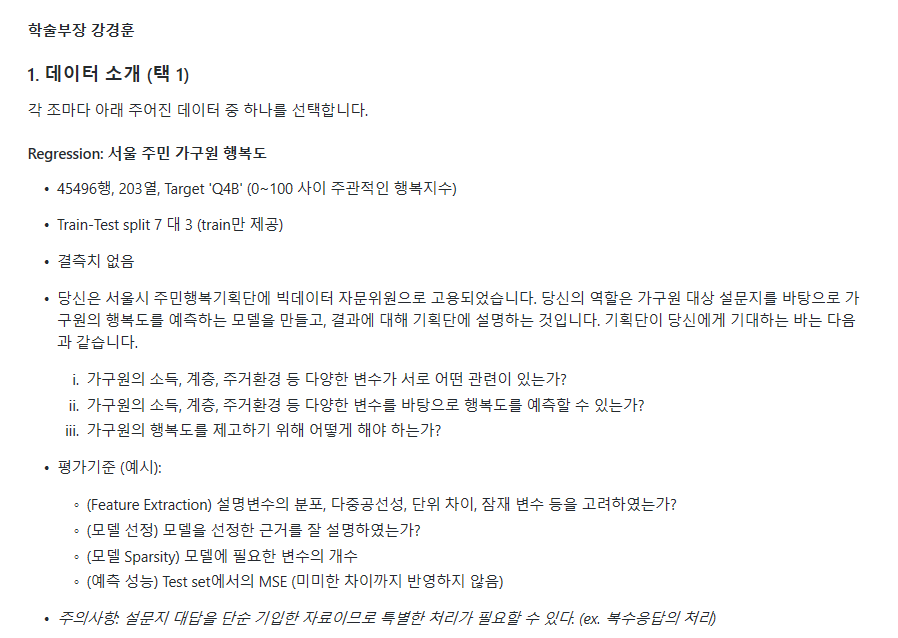

In [3]:
from IPython.display import Image
Image(filename="C:/ESC2020_spring/finalproject/description.png",width=1500,height=1500)

### Project Steps

1) EDA : 각 변수들의 상호 연관성, outlier, 각 변수들의 분포 (plain, bell, skewed, lots of NA's(무응답))

2) Prediction  : Q4B 단일변수 (**정규성 가정 만족 ?? 아님 변환?? 혹은 GLM??**)

3) 정책적 제언 : 구별 특징 두드러지면 mapping  + **문항에 대한 보완점**

### 짚고 넘어갈 주의점들

- NA가 많다! NA가 없는 데이터라고 학술부장께서 얘기한 거는 필요한 코딩이 다 완료되었다는 것.

  1) 연결문항으로 인해 답하지 않아도 되는 문항들은 다 NA(빔)
  
  2) 무응답이여서 99/9로 코딩된 것들 : NA가 아니지만 사실상 NA. 1)의 실제 NA랑 비교 위해 '무응답'으로 표시

- Y변수에 무응답이 있는 record는 삭제해야!

- 연결문항에 대해 어떻게 할지 !!!! 

- 1순위, 2순위들 ( Q14,17,19,21,25,31)

- **같은 카테고리 안의 문항들 사이의 수치적 연관성!**


### EDA 순서

1) 먼저, data glimpse 없이도 없애버릴 수 있는 변수들 제거!

2) 일단 어떤 변수들에 NA가 있는지 확인! -> **각 변수별로 무응답 돌아다니며 탐구 및 처리 !**

(말했지만 무응답이 많다! 결측치 처리법들을 참고해 무응답들을 처리하자! 가령, 변수 제거 / median or mean으로 대체)

3) 변수 Type 확인 및 정리 : numeric /ordinal(박사석사대졸등등) / nominal(종교)

4) 각 변수들의 분포 파악

5) Outlier 제거? 남김?

6) 각 설명변수들끼리의 상호 연관성





1 - 행정구역 : nominal

2 - Fam 1 - Fam2 : 집에 15세 미만이 몇명?

3 - Fam 2 : 15세 이상   -  다중공선성 문제 x 이유는 전체 가구원 수가 다르므로

4 - HTYP : NOMINAL

5 - HLIV : NOMINAL

6 - INC : NUMERIC 50 100 150 200 ... 900이상 -> 900이상에서 문제가 발생!

        : ORDINAL 여기서는 정보손실이 있으나 900만원 이상에 대한 문제가 X : ORDINAL!!!!!!!
        
7 - REL : NOMINAL

8 - JEN : NOMINAL

9 : MAR : NOMINAL - 기타! 를 NA로 처리할지?

10 : RLI : NOMINAL (7~99 없음)

11 : FC : 변수 삭제 

12 : NUMERICAL ->2014에서 빼서 + 1

13 : Q1 : NOMINAL 그대로

14 : Q2 : ORDINAL 

15 : Q2A &B 합쳐 : 0(경험없음) 12345 NOMINAL(ORDINAL 큰일!)

16 : Q3 : 어느 모임이나 단체에도 참여한 적 없다 / 뭐라도 했다 이것만! (Q3A1 ~ Q3A11을 녹인다!) 

단, 외향성 변수는 아님! 이들 중 아무것도 안했어도 외향적일수도

17 : Q5 모두 살려놓고 ORDINAL

18 : Q6 다 살려놓거나 EDA에서 묶을 수 있는거 보자 ORDINAL

19 : Q7 ORDINAL

20 : Q8 ORDINAL -> Q7,8도 EDA에서 다중공선성 심하면 하나로 합쳐

21 : Q9 ORDINAL

22 : Q10(실천도 변수들) : ORDINAL (9 빼고 평균)

23 : Q11 : ORDINAL

24 : Q12 : EDA 이후 분야별로 합칠 수 있으면 합치기!

    Q 12-I -1만 쓰기
    
25 : Q13 , Q13 1 둘 다 남기고 공선성 크면 하나만

26 : Q14 : 여기 기타는 남겨두기, 무응답은 전 답과 같게

27 : Q15 : ORDINAL

Q16 : 없애고 Q16A를 살려, Q16 : 2면 0으로

Q17 : 3순위 정보 없앤다!, 2순위의 NA를 1순위랑 똑같이 한다 (2순위 NA인 사람은 3순위도 NA이다. 똑같은거 3가지로 하기 그렇잖아)

Q18 : NOMINAL

Q19 : 여기 기타는 남겨두기, 무응답은 전 답과 같게

Q20 만 살린다 ! 1,2를 없앤다 결측치가 10000대 /10000대여서

Q21 : 받았다 안받았다만!! 

Q21-1 : 3순위 정보 없앤다!, 2순위의 NA를 1순위랑 똑같이 한다 (2순위 NA인 사람은 3순위도 NA이다. 똑같은거 3가지로 하기 그렇잖아)


Q22 : ORDINAL

Q23 : Q12처럼 한다.

Q24 : 24만 하고 작은 문제들 삭제

Q25 : 땡겨쓰기

Q26 : 있다 없다

Q27 : ORDINAL

Q28 : ORDINAL

Q29 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q30 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q31 : 땡겨쓰기

Q32 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q33: 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q34 : NUMERICAL

Q35 : ORDINAL, 34와 공선성 보고 비슷하면 합치기

Q36 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q37 : ORDINAL

Q38 : NOMINAL

Q39 : NOMINAL

Q40 : ORDINAL

Q41 : ORDINAL로 쓸거면 변환을 해야! (보수적인 정도로 변수 이름짓기)

Q42 : 42-2를 뺀 이유는 나중에 다룬다. 통학 안하는 사람때문이 있어서도. **통근시간만 살려** 

**시, 분 변환**

Q43 : 분포 보고 다르면 각각 쓰고 비슷하면 평균

Q44 : NOMINAL, 삭제

Q44 -1 삭제

### Q45: 각 문항별로 NA 어떻게 처리할지 보기

Q46 : 평균

### Q47) ZOOM으로 생각하는걸로 하자! 

Q48 : 6번문제처럼 ORDINAL

Q49 : 6번문제처럼 ORDINAL

DE 1, 2, 3, 5, 6, 7(안쓸가능성높음), 9는 쓴다!!!! 

### DE 1,2,3,5,6,7(안쓸가능성높음),9 쓰고 이에 해당하는 위의 문항들을 지운다!

### DE 4, DE8은 안쓰고 위에껄 쓴다

RDQ 1 : ORDINAL

RDQ 2 : ORDINAL




# EDA

### 1) 의미상 아무 의미 없는 원가중치, 표준화가중치, 기본값 (wtb1,wtb2,X)제거



In [4]:
happy.drop(['X','wtb1','wtb2'], axis = 1) 

,GU,FAM1,FAM2,HTYP,HLIV,INC,REL,JEN,MAR,RLI,...,JOB,DE1,DE2,DE3,DE4,DE5,DE6,DE7,DE8,DE9
0,680,2,2,2,1,5,1,1,1,6,...,5,1,6,2,3,1,680,5,2,3
1,680,2,2,2,1,5,2,2,1,6,...,11,2,6,2,3,1,680,5,4,4
2,680,5,5,2,1,11,3,2,2,6,...,3,2,2,3,6,2,680,5,3,2
3,680,5,5,2,1,11,3,2,2,6,...,10,2,1,3,6,2,680,5,3,4
4,680,5,5,2,1,11,3,1,2,6,...,10,1,1,1,6,2,680,5,3,4
5,680,5,5,2,1,11,2,2,1,6,...,5,2,4,2,6,1,680,5,3,3
6,680,3,2,2,2,9,1,1,1,6,...,7,1,5,3,5,1,680,5,3,3
7,680,3,3,2,1,10,2,2,1,3,...,4,2,5,2,5,1,680,5,4,3
8,680,3,3,2,2,7,1,1,4,1,...,4,1,5,3,4,4,680,5,4,3
9,680,4,2,2,2,9,2,2,1,6,...,11,2,3,3,5,1,680,5,3,4


### 2)

In [5]:
happy_na = (happy.isnull().sum() / len(happy) *100)
happy_na[happy_na !=0]

Q2B        49.765
Q3A2       55.777
Q3A3       86.257
Q3A4       96.119
Q3A5       98.600
Q3A6       99.614
Q3A7       99.915
Q3A8       99.991
Q3A9      100.000
Q3A10     100.000
Q3A11     100.000
Q10A1       1.592
Q10A2       8.559
Q10A3      27.254
Q10A4       1.042
Q10A5       0.292
Q12A2      90.913
Q12B2      88.517
Q12C2      95.180
Q12D2      94.854
Q12E2      83.512
Q12F2      35.038
Q12G2      92.461
Q12H2      90.624
Q14A2       2.079
Q16A       70.880
Q17A2       8.952
Q17A3      21.615
Q19A2      10.236
Q20A       28.652
           ...   
Q20B5     100.000
Q21A2      96.345
Q21A3      99.447
Q21A4      99.962
Q21A5      99.997
Q21A6      99.997
Q21B2      30.733
Q21B3      39.814
RQ23A2     94.166
RQ23B2     96.364
RQ23C2     94.700
RQ23D2     98.587
Q24A       49.375
Q24B       50.625
Q25A2       0.832
Q26A2      90.599
Q26A3      96.499
Q26A4      99.149
Q26A5      99.862
Q26A6     100.000
Q31A2       0.160
Q42A       24.931
Q42A1      65.332
Q42B       24.931
Q42C1     

# Model Building

In [6]:
from scipy.stats import norm
import math
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

## LASSO

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

## Principal Component Regression

## Partial Least Square Regression

## FA -> Some Regression

## Support Vector Machine Regression

In [8]:
import geopandas as gpd
import pickle

ModuleNotFoundError: No module named 'geopandas'